# 백엔드 설정

In [1]:
import numpy as np

In [2]:
import os

# The distribution API is only implemented for the JAX backend for now.
# os.environ["KERAS_BACKEND"] = "jax"
os.environ["KERAS_BACKEND"] = "tensorflow"

# 데이터 처리

In [3]:
# 데이터셋 로드 및 전처리
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# 데이터 평탄화 (flatten)
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# 모델 정의

In [5]:
from keras.models import Sequential
from keras.layers import Input, Dense

# Keras 모델 정의
model = Sequential([
    Input(shape=(784,)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# JAX 백엔드를 사용하여 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 트레이닝

In [6]:
# 모델 훈련
model.fit(x_train, y_train, 
          epochs=5, batch_size=32, 
          validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8804 - loss: 0.4292 - val_accuracy: 0.9598 - val_loss: 0.1353
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9645 - loss: 0.1215 - val_accuracy: 0.9691 - val_loss: 0.1003
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9772 - loss: 0.0786 - val_accuracy: 0.9719 - val_loss: 0.0908
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9827 - loss: 0.0572 - val_accuracy: 0.9747 - val_loss: 0.0795
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9874 - loss: 0.0425 - val_accuracy: 0.9773 - val_loss: 0.0712


# 트레이닝 후, 예측

In [7]:
import requests
from PIL import Image
from io import BytesIO

In [8]:
# 이미지 다운로드 및 전처리
url = "https://machinelearningmastery.com/wp-content/uploads/2019/02/sample_image.png"
response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert('L').resize((28, 28))
img_array = np.array(img) / 255.0
img_array = img_array.reshape(1, 784)

In [9]:
import matplotlib.pyplot as plt

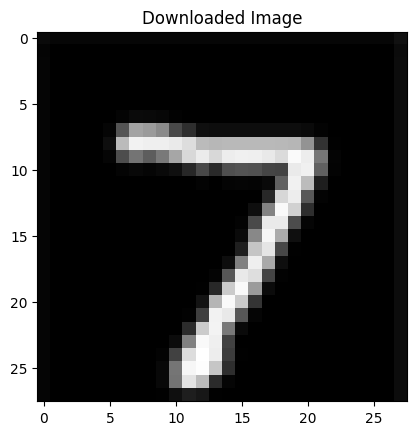

In [10]:
# 이미지 표시
plt.imshow(np.array(img).reshape(28, 28), cmap='gray')
plt.title("Downloaded Image")
plt.show()

In [11]:
# 이미지 분류
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)

print(f"Predicted class: {predicted_class[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted class: 7
